# Step 12: 2-D Poisson Equation

The 2-D Poisson equation is nothing else than a 2-D Laplace equation with an added source term $b\left(x,\; y\right)$: $$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = b\left(x,\; y\right)$$

Through the _Relaxation method_, the idea is to relax the source component of the field by successive iterative procedures. The discretized version leads to the following:

$$p_{i,\; j}^n = \frac{\Delta x^2\left(p_{i,\; j+1}^{n-1} + p_{i,\; j-1}^{n-1}\right) + \Delta y^2\left(p_{i+1,\; j}^{n-1} + p_{i-1,\; j}^{n-1}\right) - b_{i,\; j}^n \Delta x^2 \Delta y^2}{2\left(\Delta x^2 + \Delta y^2\right)}$$

As boundary conditions we set $p = 0$ along the entire contour and choose the source term to be described as $b\left(0.5,\; 0.5\right) = 100 \;\;\wedge\;\; b\left(1.5,\; 1.5\right) = -100$. 

The initial value of $p$, will be $p_{i,\; j}^0 = 0$ everywhere.

For further readings, start from here:
- [Discrete Poisson equation](https://en.wikipedia.org/wiki/Discrete_Poisson_equation)

In [19]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

def plot2D (x, y, z, mpl = True):
    
    # To use this function, paste the following:
    
    # import numpy as np
    # from matplotlib import pyplot as plt, cm
    # from mpl_toolkits.mplot3d import Axes3D
    # import plotly.graph_objects as go
    
    if (mpl == True):   # Draw using matplotlib
        fig = plt.figure(figsize = (11,7), dpi = 100)
        ax = fig.add_subplot(111, projection = '3d')
        ax.view_init(elev=30, azim=-225, roll=0)
        X, Y = np.meshgrid(x, y)
        surf = ax.plot_surface(X, Y, z, cmap = cm.plasma)
        ax.set_xlabel("x axis")
        ax.set_ylabel("y axis")
        plt.show()
    else:   # Draw using plotly
        # fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, name='ICs', opacity=0.3),
        #                       go.Surface(z=u, x=x, y=y, name='u')])
        fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, name='u')])
        fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                     highlightcolor="limegreen", project_z=True))
        fig.update_layout(title='2D Poisson equation', autosize=False, showlegend=False, 
                          width=900, height=500, 
                          margin=dict(l=65, r=50, b=10, t=50),
                          scene=dict(xaxis_title='x position', yaxis_title='y position', zaxis_title='Value'))

        fig.show()

# Calculate the distance between two following iterations (a is after b)
def my_dist (a, b):
    ny = np.size(a, axis=0)
    nx = np.size(a, axis=1)
    return np.sum(np.abs(a - b)) / (np.sum(np.abs(b)) + 1e-8)
    # return np.sum(np.abs(a) - np.abs(b)) / np.sum(np.abs(b))

def poisson2D (p, b, dx, dy, epsilon = 1e-4, max_iter = 1e5):
    iter = 0
    dist = 1
    pn = np.zeros_like(p)

    while (dist > epsilon and iter <= max_iter):

        pn = p.copy()
        # Remember: 1st index regards y-axis, 2nd index the x-axis
        p[1:-1,1:-1] = ( (pn[2:, 1:-1] + pn[0:-2, 1:-1])*dx**2 + (pn[1:-1, 2:] + pn[1:-1, 0:-2])*dy**2 - b[1:-1, 1:-1]*(dx*dy)**2 ) / (2*(dx**2 + dy**2))

        # BCs:
        p[:, 0] = 0
        p[:, -1] = 0
        p[0, :] = 0
        p[-1, :] = 0
        
        # Escape terms
        dist = my_dist(p, pn)
        iter += 1

    return p, (iter, max_iter)

In [22]:
# %%timeit
nx = 51
ny = 51
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

# ATTENTION: numpy and matplotlib use different matrix notation
#   - numpy: my_array = np.array((A, B)) indicates an array of A rows and B columns
#   - matplotlib: my_array is now interpreted as an array with B rows and A columns, because it has B elements on the x-axis and A elements on the y-axis
# Thus, we define ICs as an array with numpy_rows equal to ny and numpy_cols equal to nx, but we will treat it in matplotlib way (so e.g. the first index indicates the y coordinate)

# Initial conditions
ICs = np.zeros((ny, nx))   # y-axis with ny elements, x-axis with nx elements (ny numpy-rows and nx numpy-cols)
ICs[:, 0] = 0
ICs[:, -1] = 0
ICs[0, :] = 0
ICs[-1, :] = 0

b = np.zeros((ny, nx))
b[int(0.5/dy), int(0.5/dx)] = 100
b[int(1.5/dy), int(1.5/dx)] = -100

# plot2D(x, y, b, mpl=False)

p = np.zeros((ny, nx))

p, [iter, max_iter] = poisson2D(ICs, b, dx, dy)
print(iter, '/', f'{max_iter:.5e}')
# plot2D(x, y, p, mpl=False)

825 / 1.00000e+05


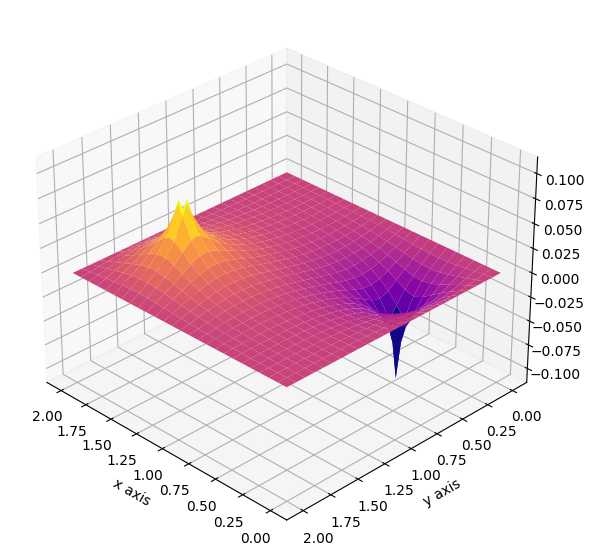

In [24]:
plot2D(x, y, p, mpl=True)